In [1]:
from astropy.io.votable import from_table, parse_single_table
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import numpy as np

## Spectra plots

In [8]:
def highlight_features(ax, ranges):
    if ranges is not None:
        ylim = ax.get_ylim()
        colors = list(mcolors.TABLEAU_COLORS.keys())
        #y = np.arange(0.0, 2, 0.01)
        for idx, rng in enumerate(ranges):
            color_idx = (idx+1) % len(colors)
            ax.fill_betweenx(ylim, rng[0], rng[1], color=colors[color_idx], alpha=0.4, zorder=-1)


def plot_combined_spectrum(velocity, em_mean, em_std, opacity, sigma_opacity, filename, title, vel_range=None, ranges=None):
    fig, axs = plt.subplots(2, 1, figsize=(4, 5))
    
    axs[0].set_title(title) #, fontsize=16)

    axs[0].axhline(1, color='r')
    axs[0].plot(velocity, opacity, zorder=4, lw=0.8, color='black')
    axs[0].fill_between(velocity, 1-sigma_opacity, 1+sigma_opacity, color='grey', alpha=0.6, zorder=1)
    axs[0].plot(velocity, 1-(3*sigma_opacity), zorder=1, lw=2, ls=":", color='orange')
    axs[0].set_ylabel(r'Absorption ($e^{-\tau})$')#, fontsize=14)
    axs[0].grid(True)

    axs[0].xaxis.set_minor_locator(AutoMinorLocator())
    axs[0].tick_params(which='both', direction='in', bottom=True, top=True)

    highlight_features(axs[0], ranges)

    axs[1].plot(velocity, em_mean, color='black', zorder=4, lw=1)
    axs[1].fill_between(velocity, em_mean-em_std, em_mean+em_std, color='grey', alpha=0.8, zorder=1)
    axs[1].set_ylabel(r'Brightness Temp (K)')#, fontsize=14)
    axs[1].set_xlabel(r'Velocity relative to LSRK (km/s)') #, fontsize=14)
    axs[1].grid(True)

    axs[1].xaxis.set_minor_locator(AutoMinorLocator())
    axs[1].tick_params(which='both', direction='in', bottom=True, top=True)


    highlight_features(axs[1], ranges)
    
    if vel_range is None:
        vel_range = (np.min(velocity), np.max(velocity))
    axs[0].set_xlim(vel_range)
    axs[1].set_xlim(vel_range)

    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close()
    return

def plot_source(source, abs_table, spectra_folder, figures_folder, no_zoom=False):
    comp_name = source['comp_name']

    abs_spec_filename = '{}/{}_spec.vot'.format(spectra_folder, comp_name)
    abs_spec_votable = parse_single_table(abs_spec_filename)
    abs_spec = abs_spec_votable.to_table()
    abs_velocity = abs_spec['velocity']

    tgt_abs = abs_table[abs_table['comp_name']==comp_name]
    start_vel = tgt_abs['start_vel'].data
    end_vel = tgt_abs['end_vel'].data
    ranges = np.stack((start_vel,end_vel), axis=-1)
    vel_ranges = None if no_zoom else (75,350)

    title = 'Source #{} {}'.format(source['id'], comp_name)
    filename = '{}/{}_combined.pdf'.format(figures_folder, comp_name)
    plot_combined_spectrum(abs_velocity/1000, abs_spec['em_mean'], abs_spec['em_std'], 
        abs_spec['opacity'], abs_spec['sigma_opacity'], 
        filename, title, ranges=ranges, vel_range=vel_ranges)


In [3]:
abs_table = parse_single_table('sb10944/v3a/askap_absorption.vot').to_table()
spectra_table = parse_single_table('sb10944/v3a/askap_spectra.vot').to_table()


In [10]:
comp_name = 'J005556-722605'
source = spectra_table[spectra_table['comp_name'] == comp_name]

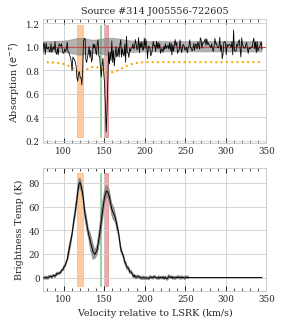

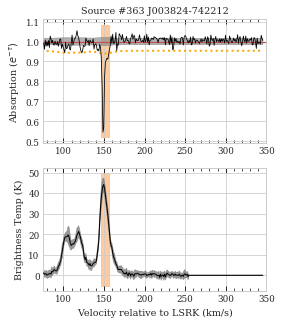

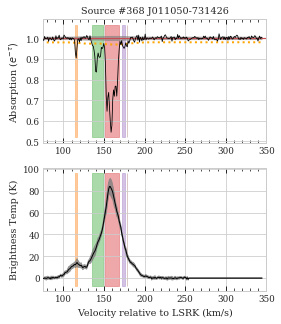

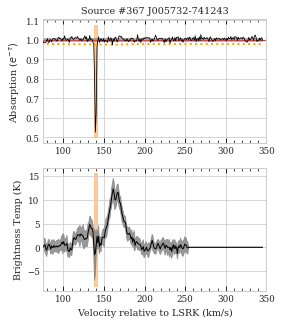

In [9]:
sns.set(style="whitegrid")
sns.set_context("paper")
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
    
comp_names = ['J005556-722605', 'J003824-742212', 'J011050-731426', 'J005732-741243']
for comp_name in comp_names:
    source = spectra_table[spectra_table['comp_name'] == comp_name]
    plot_source(source[0], abs_table, 'sb10944/v3a/spectra', 'figures')

In [85]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}